## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
#import os
import keras

#本作業可以不需使用GPU, 將GPU設定為"無"(若有GPU且想開啟, 可設為 "0")
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
#從Keras的內建功能中, 取得train與test資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
#將X與Y獨立放進變數
x_train, y_train = train
x_test, y_test = test
#資料前處理-將圖片標準化
x_train = x_train / 255.
x_test = x_test / 255.

#將資料從圖形(RGB)轉為向量(Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

#將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model
model = build_mlp()

In [5]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
Compile 模型
"""
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/500
196/196 [==============================] - 2s 12ms/step - loss: 1.9515 - accuracy: 0.2953 - val_loss: 1.8287 - val_accuracy: 0.3431
Epoch 2/500
196/196 [==============================] - 2s 11ms/step - loss: 1.7185 - accuracy: 0.3846 - val_loss: 1.6656 - val_accuracy: 0.4101
Epoch 3/500
196/196 [==============================] - 2s 11ms/step - loss: 1.6172 - accuracy: 0.4234 - val_loss: 1.6106 - val_accuracy: 0.4173
Epoch 4/500
196/196 [==============================] - 2s 11ms/step - loss: 1.5576 - accuracy: 0.4441 - val_loss: 1.5407 - val_accuracy: 0.4496
Epoch 5/500
196/196 [==============================] - 2s 12ms/step - loss: 1.4987 - accuracy: 0.4659 - val_loss: 1.5497 - val_accuracy: 0.4476
Epoch 6/500
196/196 [==============================] - 2s 12ms/step - loss: 1.4685 - accuracy: 0.4755 - val_loss: 1.5075 - val_accuracy: 0.4570
Epoch 7/500
196/196 [==============================] - 2s 12ms/step - loss: 1.4288 - accuracy: 0.4912 - val_loss: 1.4704 - val_accuracy:

196/196 [==============================] - 2s 12ms/step - loss: 0.5781 - accuracy: 0.7913 - val_loss: 1.9403 - val_accuracy: 0.5190
Epoch 58/500
196/196 [==============================] - 2s 12ms/step - loss: 0.5535 - accuracy: 0.8048 - val_loss: 2.0022 - val_accuracy: 0.5147
Epoch 59/500
196/196 [==============================] - 2s 12ms/step - loss: 0.5703 - accuracy: 0.7956 - val_loss: 2.0446 - val_accuracy: 0.5010
Epoch 60/500
196/196 [==============================] - 2s 12ms/step - loss: 0.5397 - accuracy: 0.8073 - val_loss: 2.0758 - val_accuracy: 0.5143
Epoch 61/500
196/196 [==============================] - 2s 12ms/step - loss: 0.5357 - accuracy: 0.8099 - val_loss: 2.0281 - val_accuracy: 0.5172
Epoch 62/500
196/196 [==============================] - 2s 12ms/step - loss: 0.5280 - accuracy: 0.8121 - val_loss: 2.1643 - val_accuracy: 0.5022
Epoch 63/500
196/196 [==============================] - 2s 12ms/step - loss: 0.5208 - accuracy: 0.8147 - val_loss: 2.1512 - val_accuracy: 0.511

196/196 [==============================] - 2s 12ms/step - loss: 0.2639 - accuracy: 0.9057 - val_loss: 3.6966 - val_accuracy: 0.5024
Epoch 114/500
196/196 [==============================] - 2s 12ms/step - loss: 0.2315 - accuracy: 0.9184 - val_loss: 3.6945 - val_accuracy: 0.5064
Epoch 115/500
196/196 [==============================] - 2s 12ms/step - loss: 0.2379 - accuracy: 0.9169 - val_loss: 3.7485 - val_accuracy: 0.4938
Epoch 116/500
196/196 [==============================] - 2s 12ms/step - loss: 0.2643 - accuracy: 0.9056 - val_loss: 3.6395 - val_accuracy: 0.4966
Epoch 117/500
196/196 [==============================] - 2s 11ms/step - loss: 0.2484 - accuracy: 0.9113 - val_loss: 3.7189 - val_accuracy: 0.5006
Epoch 118/500
196/196 [==============================] - 2s 11ms/step - loss: 0.2577 - accuracy: 0.9078 - val_loss: 3.9104 - val_accuracy: 0.4974
Epoch 119/500
196/196 [==============================] - 2s 12ms/step - loss: 0.2558 - accuracy: 0.9084 - val_loss: 3.7613 - val_accuracy:

196/196 [==============================] - 2s 12ms/step - loss: 0.2024 - accuracy: 0.9296 - val_loss: 5.0991 - val_accuracy: 0.4900
Epoch 170/500
196/196 [==============================] - 2s 11ms/step - loss: 0.2080 - accuracy: 0.9264 - val_loss: 5.1151 - val_accuracy: 0.4960
Epoch 171/500
196/196 [==============================] - 2s 11ms/step - loss: 0.1848 - accuracy: 0.9358 - val_loss: 4.9562 - val_accuracy: 0.4978
Epoch 172/500
196/196 [==============================] - 2s 11ms/step - loss: 0.1306 - accuracy: 0.9540 - val_loss: 5.0909 - val_accuracy: 0.4889
Epoch 173/500
196/196 [==============================] - 2s 11ms/step - loss: 0.1350 - accuracy: 0.9523 - val_loss: 5.3134 - val_accuracy: 0.4973
Epoch 174/500
196/196 [==============================] - 2s 11ms/step - loss: 0.1847 - accuracy: 0.9355 - val_loss: 5.2413 - val_accuracy: 0.4986
Epoch 175/500
196/196 [==============================] - 2s 11ms/step - loss: 0.1757 - accuracy: 0.9376 - val_loss: 5.0373 - val_accuracy:

196/196 [==============================] - 2s 11ms/step - loss: 0.1264 - accuracy: 0.9560 - val_loss: 5.8646 - val_accuracy: 0.4886
Epoch 226/500
196/196 [==============================] - 2s 11ms/step - loss: 0.1738 - accuracy: 0.9399 - val_loss: 6.0573 - val_accuracy: 0.4900
Epoch 227/500
196/196 [==============================] - 2s 11ms/step - loss: 0.1529 - accuracy: 0.9473 - val_loss: 5.8423 - val_accuracy: 0.4911
Epoch 228/500
196/196 [==============================] - 2s 11ms/step - loss: 0.1173 - accuracy: 0.9599 - val_loss: 5.9557 - val_accuracy: 0.4938
Epoch 229/500
196/196 [==============================] - 2s 11ms/step - loss: 0.1171 - accuracy: 0.9591 - val_loss: 5.8208 - val_accuracy: 0.4974
Epoch 230/500
196/196 [==============================] - 2s 11ms/step - loss: 0.1383 - accuracy: 0.9528 - val_loss: 5.8218 - val_accuracy: 0.4913
Epoch 231/500
196/196 [==============================] - 2s 11ms/step - loss: 0.1272 - accuracy: 0.9561 - val_loss: 6.0272 - val_accuracy:

196/196 [==============================] - 2s 11ms/step - loss: 0.1026 - accuracy: 0.9649 - val_loss: 6.9051 - val_accuracy: 0.4871
Epoch 282/500
196/196 [==============================] - 2s 11ms/step - loss: 0.1071 - accuracy: 0.9634 - val_loss: 6.7404 - val_accuracy: 0.4961
Epoch 283/500
196/196 [==============================] - 2s 11ms/step - loss: 0.1390 - accuracy: 0.9531 - val_loss: 7.1730 - val_accuracy: 0.4882
Epoch 284/500
196/196 [==============================] - 2s 11ms/step - loss: 0.1416 - accuracy: 0.9532 - val_loss: 6.9112 - val_accuracy: 0.4964
Epoch 285/500
196/196 [==============================] - 2s 12ms/step - loss: 0.1449 - accuracy: 0.9531 - val_loss: 6.8800 - val_accuracy: 0.4916
Epoch 286/500
196/196 [==============================] - 2s 12ms/step - loss: 0.1074 - accuracy: 0.9630 - val_loss: 6.7594 - val_accuracy: 0.4985
Epoch 287/500
196/196 [==============================] - 2s 12ms/step - loss: 0.0918 - accuracy: 0.9683 - val_loss: 6.6922 - val_accuracy:

196/196 [==============================] - 2s 11ms/step - loss: 0.0403 - accuracy: 0.9871 - val_loss: 7.2095 - val_accuracy: 0.4999
Epoch 338/500
196/196 [==============================] - 2s 11ms/step - loss: 0.0411 - accuracy: 0.9868 - val_loss: 7.4060 - val_accuracy: 0.4944
Epoch 339/500
196/196 [==============================] - 2s 11ms/step - loss: 0.2189 - accuracy: 0.9337 - val_loss: 7.2221 - val_accuracy: 0.4862
Epoch 340/500
196/196 [==============================] - 2s 11ms/step - loss: 0.1694 - accuracy: 0.9468 - val_loss: 7.1282 - val_accuracy: 0.4939
Epoch 341/500
196/196 [==============================] - 2s 11ms/step - loss: 0.1107 - accuracy: 0.9644 - val_loss: 7.1519 - val_accuracy: 0.4964
Epoch 342/500
196/196 [==============================] - 2s 11ms/step - loss: 0.0657 - accuracy: 0.9777 - val_loss: 7.1625 - val_accuracy: 0.4942
Epoch 343/500
196/196 [==============================] - 2s 11ms/step - loss: 0.0691 - accuracy: 0.9762 - val_loss: 7.2284 - val_accuracy:

196/196 [==============================] - 2s 12ms/step - loss: 0.1214 - accuracy: 0.9606 - val_loss: 7.3837 - val_accuracy: 0.4888
Epoch 394/500
196/196 [==============================] - 2s 11ms/step - loss: 0.1457 - accuracy: 0.9537 - val_loss: 7.2744 - val_accuracy: 0.4883
Epoch 395/500
196/196 [==============================] - 2s 11ms/step - loss: 0.0733 - accuracy: 0.9751 - val_loss: 7.2502 - val_accuracy: 0.4960
Epoch 396/500
196/196 [==============================] - 2s 12ms/step - loss: 0.0923 - accuracy: 0.9699 - val_loss: 7.4549 - val_accuracy: 0.4912
Epoch 397/500
196/196 [==============================] - 2s 11ms/step - loss: 0.0967 - accuracy: 0.9679 - val_loss: 7.4144 - val_accuracy: 0.5000
Epoch 398/500
196/196 [==============================] - 2s 12ms/step - loss: 0.0636 - accuracy: 0.9789 - val_loss: 7.5228 - val_accuracy: 0.4997
Epoch 399/500
196/196 [==============================] - 2s 13ms/step - loss: 0.0615 - accuracy: 0.9787 - val_loss: 7.4541 - val_accuracy:

196/196 [==============================] - 3s 13ms/step - loss: 0.0179 - accuracy: 0.9956 - val_loss: 7.3462 - val_accuracy: 0.4981
Epoch 450/500
196/196 [==============================] - 2s 12ms/step - loss: 0.0093 - accuracy: 0.9984 - val_loss: 7.3957 - val_accuracy: 0.5006
Epoch 451/500
196/196 [==============================] - 2s 12ms/step - loss: 0.0060 - accuracy: 0.9994 - val_loss: 7.4611 - val_accuracy: 0.4994
Epoch 452/500
196/196 [==============================] - 2s 12ms/step - loss: 0.0042 - accuracy: 0.9997 - val_loss: 7.5401 - val_accuracy: 0.5021
Epoch 453/500
196/196 [==============================] - 2s 12ms/step - loss: 0.1604 - accuracy: 0.9566 - val_loss: 7.5429 - val_accuracy: 0.4704
Epoch 454/500
196/196 [==============================] - 2s 12ms/step - loss: 0.3313 - accuracy: 0.9097 - val_loss: 7.2222 - val_accuracy: 0.4939
Epoch 455/500
196/196 [==============================] - 2s 12ms/step - loss: 0.0696 - accuracy: 0.9777 - val_loss: 7.0433 - val_accuracy:

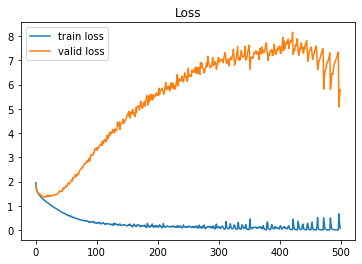

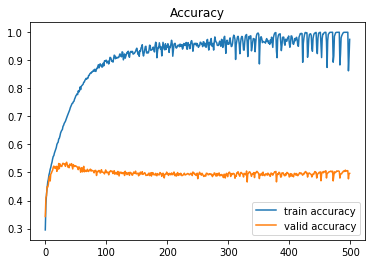

In [9]:
#以視覺畫方式檢視訓練過程
import matplotlib.pyplot as plt
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()